**Este projeto simula a análise de um teste A/B feito por uma loja online para testar hipóteses e aumentar sua receita.**

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [166]:
# melhorar o estilo dos gráficos 
plt.style.use('seaborn-darkgrid')

hypotheses = pd.read_csv("/datasets/hypotheses_us.csv", sep=';')
orders = pd.read_csv("/datasets/orders_us.csv")
visits = pd.read_csv("/datasets/visits_us.csv")

print(hypotheses.head())

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  


Havia um erro na separação das colunas "Hypothesis;Reach;Impact;Confidence;Effort". Então coloquei para separar com ponto e vírgula.

In [167]:
print(orders.head())

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B


In [168]:
print(visits.head())

         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756


In [169]:
hypotheses.info()
orders.info()
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (tota

In [170]:
# convertendo as colunas de datas para o tipo datetime
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])

In [171]:
display(hypotheses)
hypotheses.info()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [172]:
display(visits.head())
visits.info()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [173]:
display(hypotheses)
hypotheses.info()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


**Priorização das Hipóteses (ICE e RICE)**

In [174]:
# calculando o ICE
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# ordenando em decrescente
hypotheses_ice = hypotheses.sort_values(by='ICE', ascending=False)
print(hypotheses_ice[['Hypothesis', 'ICE']])

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


In [175]:
# calculando o RICE
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

#ordenando em decrescente
hypotheses_rice = hypotheses.sort_values(by='RICE', ascending=False)
print(hypotheses_rice[['Hypothesis', 'RICE']])

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


**Conclusão ICE**<br>
A hipótese com maior pontuação no ICE é: Launch a promotion that gives users discounts on their first order (16.2)<br>
Isso indica que ela gera impacto com esforço baixo.

**Conclusão RICE**<br>
Quando incluímos o alcance Reach, a ordem muda bastante.<br>
"Add a subscription form to all the main pages" sobe para o topo (112.0), pois tem o maior alcance (10).<br>
"Add product recommendation blocks to the store" também sobe bastante (56.0) por ter bom alcance e baixo esforço.

<div class="alert alert-block alert-warning">
<b> Comentário: </b> <a class="tocSkip"></a>
    
RICE e ICE calculados com sucesso! 

Sugestão:
Aqui você poderia plotar a distribuição dos atributos de cada hipótese usando um gráfico de caixa (boxplot). 
    
```python
df_hypotheses.drop(columns=['ICE', 'RICE']).boxplot(figsize=(10, 6))
... # seu código
```
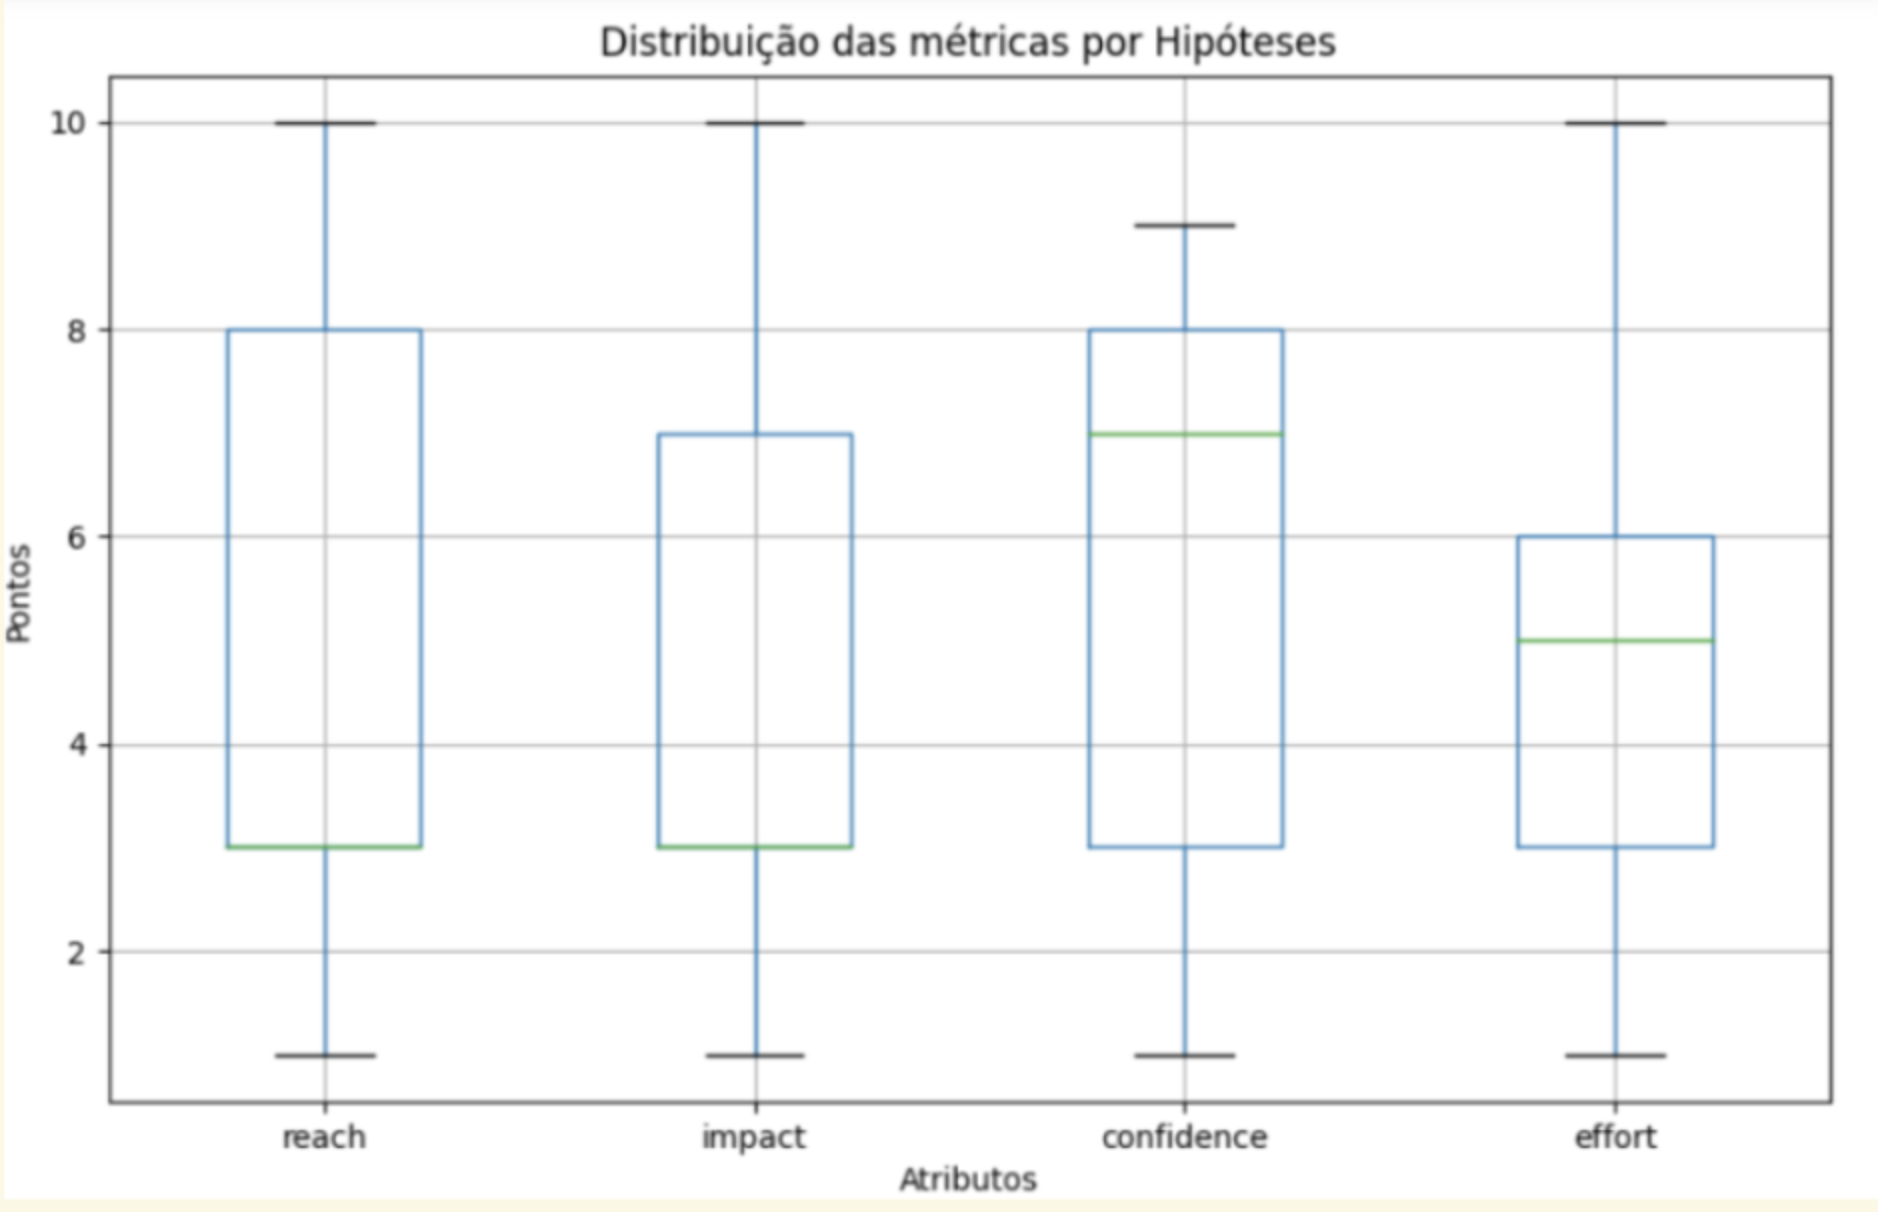   
</div>




**Checando quem participa de vários grupos**

In [176]:
# pegando os usuários dos dois grupos
usuarios_a = orders[orders['group'] == 'A']['visitorId']
usuarios_b = orders[orders['group'] == 'B']['visitorId']

# verificando a interseção dos dois grupos
usuarios_ambos = np.intersect1d(usuarios_a, usuarios_b)

# mostrando quantos usuários estão nos dois grupos
print(f'Numero de usuarios em ambos os grupos: {len(usuarios_ambos)}')
print('Usuarios em ambos grupos:')
print(usuarios_ambos)

Numero de usuarios em ambos os grupos: 58
Usuarios em ambos grupos:
[   8300375  199603092  232979603  237748145  276558944  351125977
  393266494  457167155  471551937  477780734  818047933  963407295
 1230306981 1294878855 1316129916 1333886533 1404934699 1602967004
 1614305549 1648269707 1668030113 1738359350 1801183820 1959144690
 2038680547 2044997962 2378935119 2458001652 2579882178 2587333274
 2600415354 2654030115 2686716486 2712142231 2716752286 2780786433
 2927087541 2949041841 2954449915 3062433592 3202540741 3234906277
 3656415546 3717692402 3766097110 3803269165 3891541246 3941795274
 3951559397 3957174400 3963646447 3972127743 3984495233 4069496402
 4120364173 4186807279 4256040402 4266935830]


**Removendo usuarios que estão em ambos grupos**

In [177]:
orders_clean = orders[~orders['visitorId'].isin(usuarios_ambos)]

# verificando se os usuarios foram removidos
print(f'Dados após a limpeza: {orders_clean.shape[0]} linhas')

# conferindo se ainda existem usuarios nos dois grupos
usuarios_a_clean = orders_clean[orders_clean['group'] == 'A']['visitorId']
usuarios_b_clean = orders_clean[orders_clean['group'] == 'B']['visitorId']
usuarios_ambos_clean = np.intersect1d(usuarios_a_clean, usuarios_b_clean)

print(f'Número de usuários em ambos os grupos após a limpeza: {len(usuarios_ambos_clean)}')

Dados após a limpeza: 1016 linhas
Número de usuários em ambos os grupos após a limpeza: 0


**Conclusão:**<br>
Após identificar que 58 usuários estavam ao mesmo tempo em ambos os grupos, realizri a limpeza dos dados, removendo esses usuários do dataframe de pedidos. <br>
Esse procedimento é fundamental para garantir a validade estatística do teste A/B, pois evita contaminação entre os grupos que poderia gerar conclusões incorretas.<br>

**Análise Gráfica das Métricas**

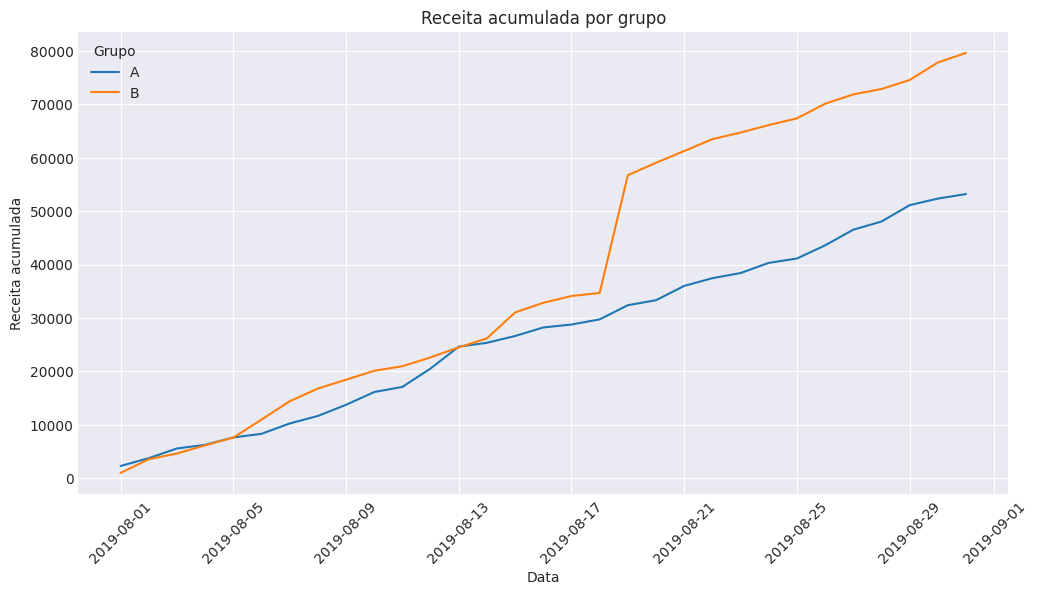

In [178]:
# grupando os dados de pedidos limpos por data e grupo
revenue_cumulative = (orders_clean
    .groupby(['date', 'group'])
    .agg({'revenue': 'sum'})
    .groupby('group')
    .cumsum()
    .reset_index())

# gráfico da receita acumulada
plt.figure(figsize=(12,6))
sns.lineplot(data=revenue_cumulative, x='date', y='revenue', hue='group')

plt.title('Receita acumulada por grupo')
plt.xlabel('Data')
plt.ylabel('Receita acumulada')
plt.legend(title='Grupo')
plt.xticks(rotation=45)
plt.show()

**Tamanho Médio Acumulado do Pedido**

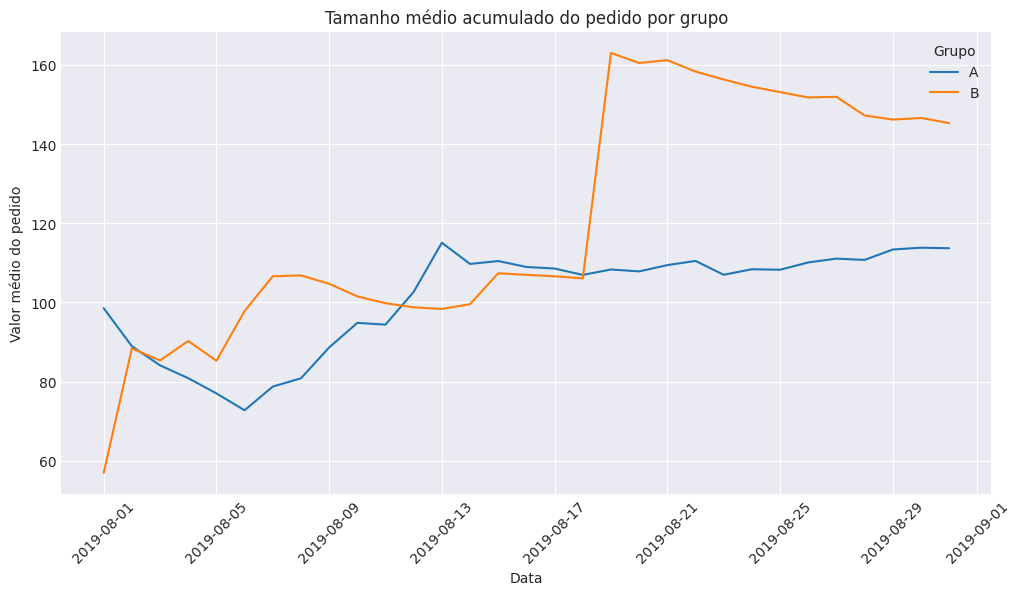

In [179]:
# calculando o numero de pedidos acumulados e receita acumulada por data e grupo
cumulative_data =(orders_clean
    .groupby(['date', 'group'])
    .agg({'revenue': 'sum', 'transactionId': 'count'})
    .rename(columns={'revenue': 'revenue_cum', 'transactionId': 'orders_cum'})
    .groupby('group')
    .cumsum()
    .reset_index())

# calculando o ticket médio acumulado
cumulative_data['avg_order_value'] = cumulative_data['revenue_cum'] / cumulative_data['orders_cum']

# gráfico do tamanho acumulado 
plt.figure(figsize=(12,6))
sns.lineplot(data=cumulative_data, x='date', y='avg_order_value', hue='group')

plt.title('Tamanho médio acumulado do pedido por grupo')
plt.xlabel('Data')
plt.ylabel('Valor médio do pedido')
plt.legend(title='Grupo')
plt.xticks(rotation=45)
plt.show()

A receita do grupo B foi maior com consistência do que a do grupo A ao longo do experimento.<br>
Podemos observar um pico muito acentuado no grupo B por volta do dia 2019-08-17, o que pode ser a presença de outliers (pedidos muito altos ou algum comportamento atípico).<br>
Apesar desse pico, o grupo B mantém uma receita acumulada maior até o final do período.

**Diferença relativa no tamanho médio acumulado dos pedidos**

In [180]:
# agrupando por data e grupo
cumulative_data = orders.groupby(['date', 'group']).agg(revenue=('revenue', 'sum'),
                    orders=('transactionId', 'nunique')).cumsum().reset_index()
cumulative_revenue = cumulative_data

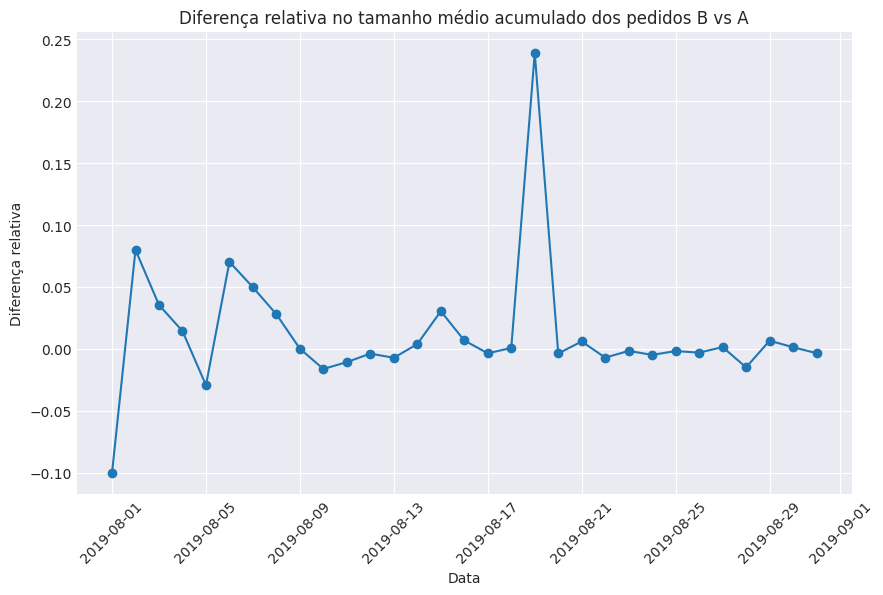

In [181]:
# calculando o tamanho médio acumulado por grupo 
cumulative_avg = (cumulative_revenue['revenue'] / cumulative_revenue['orders'])

# separando por grupo
cumulative_avg_a = cumulative_avg[cumulative_revenue['group'] == 'A']
cumulative_avg_b = cumulative_avg[cumulative_revenue['group'] == 'B']

# calculando a diferença relativa
relative_diff = (cumulative_avg_b.values - cumulative_avg_a.values) / cumulative_avg_a.values

# plotando
plt.figure(figsize=(10,6))
plt.plot(cumulative_revenue['date'].unique(), relative_diff, marker='o')
plt.title('Diferença relativa no tamanho médio acumulado dos pedidos B vs A')
plt.xlabel('Data')
plt.ylabel('Diferença relativa')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Percebemos que durante o teste, o grupo B ficou com um valor médio dos pedidos maior que o grupo A. Isso ficou ainda mais claro depois do dia 2019-08-17, quando aconteceu um pico alto no gráfico.<br>
Esse aumento fora do normal pode ser sinal de algum outlier ou compra fora do padrão, que acabou puxando a média pra cima.

**Analisando a taxa de conversão diária dos grupos A e B.**

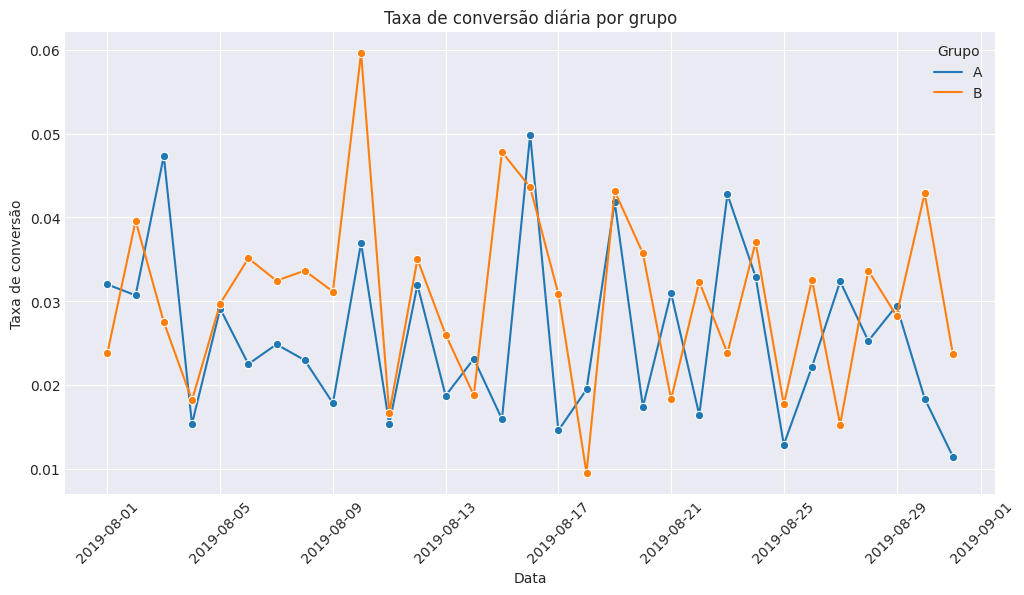

In [182]:
# calculando numero de pedidos por dia e grupo
orders_by_date = (orders_clean.groupby(['date', 'group'])
    .agg({'transactionId': 'nunique'})
    .rename(columns={'transactionId': 'orders'})
    .reset_index())

# juntando com o dataframe de visitas
conversion = orders_by_date.merge(visits, on=['date', 'group'])
#calculando taxa de conversão
conversion['conversion'] = conversion['orders'] / conversion['visits']
# plotando o gráfico
plt.figure(figsize=(12,6))
sns.lineplot(data=conversion, x='date', y='conversion', hue='group', marker='o')

plt.title('Taxa de conversão diária por grupo')
plt.xlabel('Data')
plt.ylabel('Taxa de conversão')
plt.legend(title='Grupo')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Durante boa parte do teste, o grupo **B** manteve uma taxa de conversão levemente superior ao grupo **A**. O comportamento dos dois grupos foi relativamente estável, sem grandes picos ou quedas inesperadas. Isso sugere que, até aqui, o grupo B pode ter apresentado uma performance um pouco melhor em converter visitantes em
compradores.

**Diferença relativa na conversão cumulativa (B vs A)**

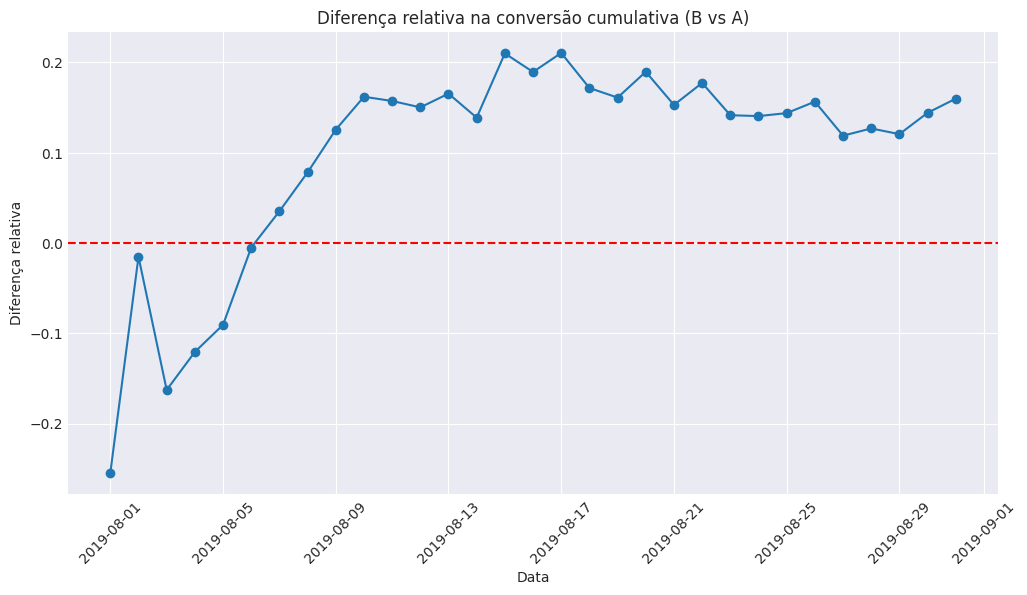

In [183]:
# primeiro, calculando pedidos e visitas por data e grupo e acumulativa
cumulative_data =  (orders_clean.groupby(['date', 'group'])
    .agg(orders=('transactionId', 'nunique'))
    .merge(
        visits.groupby(['date', 'group'])
        .agg(visits=('visits', 'sum'))
        .reset_index(),
        on=['date', 'group']).sort_values(by=['date', 'group']))

# calculando acumulados por grupo
cumulative_data['orders_cum'] = (cumulative_data.groupby('group')['orders'].cumsum())
cumulative_data['visits_cum'] = (cumulative_data.groupby('group')['visits'].cumsum())

# calculando conversão acumulada
cumulative_data['conversion_cum'] = (cumulative_data['orders_cum'] / cumulative_data['visits_cum'])

# separando por grupo
conversion_cum_a = cumulative_data[cumulative_data['group'] == 'A']
conversion_cum_b = cumulative_data[cumulative_data['group'] == 'B']

# calculando a diferença relativa (B em relação a A)
relative_diff = (
    (conversion_cum_b['conversion_cum'].values - conversion_cum_a['conversion_cum'].values)/ conversion_cum_a['conversion_cum'].values)

# plotando a diferença relativa
plt.figure(figsize=(12,6))
plt.plot(conversion_cum_a['date'], relative_diff, marker='o')
plt.title('Diferença relativa na conversão cumulativa (B vs A)')
plt.xlabel('Data')
plt.ylabel('Diferença relativa')
plt.grid(True)
plt.xticks(rotation=45)
plt.axhline(0, color='red', linestyle='--')
plt.show()

**Conclusão:**<br>
No começo, a diferença ficou um pouco negativa, ou seja, o grupo B estava pior que o A. Mas rapidamente isso mudou e o grupo B passou a ter uma conversão melhor e se manteve assim até o final do teste.<br>
Apesar de algumas oscilações naturais no meio do caminho, a diferença se estabilizou na maior parte do tempo acima de zero, mostrando que o grupo B teve uma taxa de conversão consistentemente melhor que A.<br>

**Quantos pedidos cada usuário fez?**

In [184]:
# contando quantos pedidos cada usuário fez
orders_by_users = orders.groupby('visitorId').agg({'transactionId': 'nunique'})

# renomeando a coluna para facilitar
orders_by_users.columns = ['orders']

# visualizando os dados
orders_by_users.describe()

,orders
count,1031.000000
mean,1.161009
std,0.724919
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,11.000000


A maioria dos usuários fez apenas 1 pedido. (Veja que 25%, 50% e 75% dos usuários estão no valor 1).<br>
Porém, o máximo é 11 pedidos, o que é bem acima da média (1.16) e do desvio padrão (0.72).<br>

Isso indica que existem alguns poucos usuários que fizeram muitos pedidos e eles podem estar distorcendo a análise, especialmente das métricas de receita e tamanho médio dos pedidos.



**Calculando os percentis 95% e 99% para definir a partir de quantos pedidos um usuário é considerado um outlier.**

In [185]:
# calculando os percentis 95 e 99
percentiles = np.percentile(orders_by_users['orders'], [95, 99])

print(f'Percentil 95: {percentiles[0]}')
print(f'Percentil 99: {percentiles[1]}')

Percentil 95: 2.0
Percentil 99: 4.0


In [186]:
# calculando os percentis 95 e 99 do valor dos pedidos
percentil_95 = orders['revenue'].quantile(0.95)
percentil_99 = orders['revenue'].quantile(0.99)

print(f'Percentil 95: {percentil_95}')
print(f'Percentil 99: {percentil_99}')

Percentil 95: 435.54
Percentil 99: 900.9039999999999


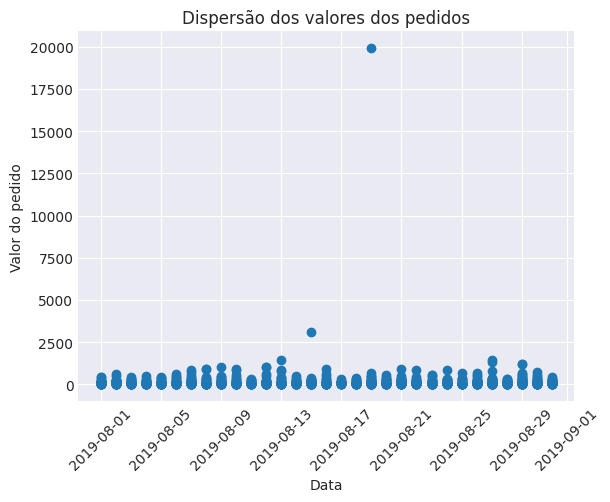

In [187]:
# plotando gráfico
plt.scatter(x=orders['date'], y=orders['revenue'])
plt.title('Dispersão dos valores dos pedidos')
plt.xlabel('Data')
plt.ylabel('Valor do pedido')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Conclusão:**<br>
A maioria dos pedidos fica abaixo de 435,54 (percentil 95) e 900,90 (percentil 99). No gráfico, dá pra ver que tem uns valores bem fora da curva, principalmente um perto de 20000, que foge totalmente do padrão. Isso mostra que alguns pedidos são bem atípicos e podem acabar distorcendo números como a média e o tamanho médio dos pedidos.

**Analisando a significância estatística da conversão entre os grupos**

In [188]:
# calculando pedidos por grupo
orders_by_group = orders.groupby('group')['transactionId'].nunique()

# calculando visitas por grupo
visits_by_group = visits.groupby('group')['visits'].sum()

#calculando conversao por grupo
conversion = orders_by_group / visits_by_group
print('Pedidos por grupo:\n', orders_by_group)
print('\nVisitas por grupo:\n', visits_by_group)
print('\nConversão por grupo:\n', conversion)

Pedidos por grupo:
 group
A    557
B    640
Name: transactionId, dtype: int64

Visitas por grupo:
 group
A    18736
B    18916
Name: visits, dtype: int64

Conversão por grupo:
 group
A    0.029729
B    0.033834
dtype: float64


**Calculando o Z-Score manualmente**

In [189]:
# dados
orders_a = orders_by_group['A']
orders_b = orders_by_group['B']
visits_a = visits_by_group['A']
visits_b = visits_by_group['B']

# conversões
p1 = orders_a / visits_a
p2 = orders_b / visits_b
# conversão combinada
p_comb = (orders_a + orders_b) / (visits_a + visits_b)

# erro padrão
difference = p1 - p2
std_dev = (p_comb * (1 - p_comb) * (1/visits_a + 1/visits_b)) ** 0.5

# calculando z-score
z_score = difference / std_dev
#calculando p-value
from scipy.stats import norm
p_value = 2 * (1 - norm.cdf(abs(z_score)))

print(f'Z-Score: {z_score:.3f}')
print(f'P-Value: {p_value:.3f}')

Z-Score: -2.270
P-Value: 0.023


O p-valor foi 0.023, ou seja, menor que 0.05.<br>
Isso indica que há diferença significativa na taxa de conversão entre os grupos A e B.<br>
Observei que o grupo B teve uma conversão maior (3,38%) do que o grupo A (2,97%).

**Comparação do tamanho médio dos pedidos entre os grupos.**

In [190]:
#media dos valores dos pedidos
media_a = orders[orders['group'] == 'A']['revenue'].mean()
media_b = orders[orders['group'] == 'B']['revenue'].mean()

print(f'Média do grupo A: {media_a}')
print(f'Média do grupo B: {media_b}')

Média do grupo A: 115.89748653500898
Média do grupo B: 145.06343750000002


In [191]:
# desvio padrão
std_a = orders[orders['group'] == 'A']['revenue'].std()
std_b = orders[orders['group'] == 'B']['revenue'].std()
# quantidade de pedidos
n_a = orders[orders['group'] == 'A']['revenue'].count()
n_b = orders[orders['group'] == 'B']['revenue'].count()

print(f'Desvio padrão grupo A: {std_a}')
print(f'Desvio padrão grupo B: {std_b}')
print(f'Quantidade grupo A: {n_a}')
print(f'Quantidade grupo B: {n_b}')

Desvio padrão grupo A: 182.35891775769417
Desvio padrão grupo B: 806.9923263645859
Quantidade grupo A: 557
Quantidade grupo B: 640


In [192]:
# calculando o erro padrao
error = ((std_a ** 2) / n_a + (std_b ** 2) / n_b) ** 0.5
# calculando o Z-Score
z_score = (media_a - media_b) / error

print(f'Z-Score: {z_score}')

Z-Score: -0.8886193336529403


O Z-Score deu -0,88 o que significa que está dentro do intervalo de confiança de 95% (-1,96 a 1,96).<br>
Ou seja, olhando só os dados brutos, não dá pra dizer que existe uma diferença real no tamanho médio dos pedidos entre os grupos A e B.<br>
Mesmo que a média do grupo B pareça maior, essa diferença pode ter sido só uma coincidência e não algo que realmente signifique uma
tendência.

**Definir os critérios para filtrar os outliers**

In [193]:
# contando pedidos por usuário
orders_by_user = orders.groupby('visitorId').agg({'transactionId': 'nunique'})
orders_by_user.columns = ['orders']

# encontrando usuários com mais de 2 pedidos
outlier_users = orders_by_user[orders_by_user['orders'] > 2].index

# filtrandoo dataframe de pedidos removendo usuários com muitos pedidos e valores muito alto
orders_filtered = orders[(~orders['visitorId'].isin(outlier_users)) & (orders['revenue'] <= 900)]

print(orders_filtered.head())

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
2     2961555356  4069496402 2019-08-15     10.2     A
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B


In [194]:
# contando pedidos por grupo nos dados filtrados
orders_by_group_filtered = orders_filtered.groupby('group')['transactionId'].nunique()

# contando visitas por grupo
visits_by_group = visits.groupby('group')['visits'].sum()

# calculando conversao por grupo
conversion_filtered = orders_by_group_filtered / visits_by_group

print('Pedidos por grupo (filtrado):\n', orders_by_group_filtered)
print('\nVisitas por grupo:\n', visits_by_group)
print('\nConversão por grupo (filtrado):\n', conversion_filtered)

Pedidos por grupo (filtrado):
 group
A    481
B    572
Name: transactionId, dtype: int64

Visitas por grupo:
 group
A    18736
B    18916
Name: visits, dtype: int64

Conversão por grupo (filtrado):
 group
A    0.025673
B    0.030239
dtype: float64


In [195]:
# contando pedidos por grupo nos dados filtrados
orders_by_group_filtered = orders_filtered.groupby('group')['transactionId'].nunique()

# contando visitas por grupo 
visits_by_group = visits.groupby('group')['visits'].sum()

# calculando conversao por grupo
conversion_filtered = orders_by_group_filtered / visits_by_group
print('Pedidos por grupo:\n', orders_by_group_filtered)
print('\nVisitas por grupo:\n', visits_by_group)
print('\nConversão por grupo:\n', conversion_filtered)

Pedidos por grupo:
 group
A    481
B    572
Name: transactionId, dtype: int64

Visitas por grupo:
 group
A    18736
B    18916
Name: visits, dtype: int64

Conversão por grupo:
 group
A    0.025673
B    0.030239
dtype: float64


In [196]:
orders_a = orders_by_group_filtered['A']
orders_b = orders_by_group_filtered['B']
visits_a = visits_by_group['A']
visits_b = visits_by_group['B']
# conversoes
p1 = orders_a / visits_a
p2 = orders_b / visits_b

# proporçao combinada
p_comb = (orders_a + orders_b) / (visits_a + visits_b)

# erro padrão
difference = p1 - p2
std_dev = (p_comb * (1 - p_comb) * (1/visits_a + 1/visits_b)) ** 0.5

# Z-Score
z_score = difference / std_dev

# p-valor 
from scipy.stats import norm
p_value = 2 * (1 - norm.cdf(abs(z_score)))
print(f'Z-Score: {z_score:.3f}')
print(f'P-Valor: {p_value:.3f}')

Z-Score: -2.687
P-Valor: 0.007


A diferença na taxa de conversão entre os grupos A e B continua sendo estatisticamente significativa, mesmo após remover os outliers.

**Testando a diferença no tamanho médio dos pedidos**

In [197]:
# separando a receita por grupo nos dados filtrados
group_a_revenue = orders_filtered[orders_filtered['group'] == 'A']['revenue']
group_b_revenue = orders_filtered[orders_filtered['group'] == 'B']['revenue']

# calculando média
media_a = group_a_revenue.mean()
media_b = group_b_revenue.mean()

# calculando desvio padrao
std_a = group_a_revenue.std()
std_b = group_b_revenue.std()

# quantidade de pedidos por grupo
n_a = group_a_revenue.count()
n_b = group_b_revenue.count()
# rro padrão
error = ((std_a ** 2) / n_a + (std_b ** 2) / n_b) ** 0.5

# Z-Score
z_score = (media_a - media_b) / error

print(f'Média grupo A: {media_a}')
print(f'Média grupo B: {media_b}')
print(f'Desvio padrão grupo A: {std_a}')
print(f'Desvio padrão grupo B: {std_b}')
print(f'Z-Score: {z_score}')

Média grupo A: 102.73451143451145
Média grupo B: 100.21678321678321
Desvio padrão grupo A: 137.28130507518574
Desvio padrão grupo B: 131.11928045608872
Z-Score: 0.30257832947982566


**Conclusão:**<br>
O Z-Score foi 0,30 ou seja, está bem dentro do intervalo de confiança (-1,96 a 1,96), o que indica que não há motivos para rejeitar a hipótese nula.<br>
Isso significa que, depois de remover os outliers, o tamanho médio dos pedidos nos grupos A e B ficou praticamente igual.<br>
As médias ficaram bem próximas:<br>
A = 102,73<br>
B = 100,21<br>
Ou seja, qualquer variação entre os grupos pode ter sido apenas um acaso, sem uma diferença estatística real.<br>

**Conclusão Final do Projeto — Teste A/B**<br>

Ao longo desse projeto, pude acompanhar todo o processo de análise de um teste A/B, desde a priorização das hipóteses até a interpretação dos resultados.
Testamos duas versões da nossa loja online, buscando entender qual delas geraria melhores resultados.<br>
Olhando para os dados, ficou claro que o grupo B trouxe uma taxa de conversão maior que o grupo A. E isso não foi por acaso, os testes mostraram que essa diferença é real, consistente e estatisticamente significativa.<br>

Por outro lado, quando analisamos o valor médio dos pedidos, não encontramos nenhuma diferença relevante entre os grupos. Isso mostra que o impacto do experimento não foi no quanto as pessoas gastaram, mas sim no fato de que mais pessoas decidiram comprar.<br>

Diante disso, a melhor decisão é encerrar o teste e seguir com as mudanças do grupo B, já que elas ajudaram a aumentar o número de vendas sem afetar negativamente o ticket médio.<br>

**Resumo da decisão:**<br>
Parar o teste e considerar o grupo B como o vencedor.<br>
O grupo B traz mais conversões, mantendo o mesmo ticket médio.